In [1]:
import pandas as pd
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt
"""
Draw Chinese characters on plot pics
"""
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
"""
Read washed data
"""
df_AH = pd.read_excel('../data/df_AH_week.xlsx')

In [33]:
from ou_noise import ou
df_test = df_AH[['time','招商银行','招商银行.1','week_num']]
df_test.columns = ['time','A','H','week_num']
df_test['DR'] =1 - (df_test['H'].copy())/df_test['A'].copy()
week_list = df_test.groupby('week_num').week_num.agg(lambda x : x.mode()[0]).values
# ou_weekly[i][0] = 1 if this week isnot missed else missed
ou_weekly = np.zeros((max(week_list)+1,4))
for w in week_list:
    # print(w)
    DR = df_test[df_test['week_num']==w]['DR'].values
    t = np.arange(1,len(DR)+1,1)
    ou_weekly[w][0] = 1
    ou_weekly[w][1:] = ou.mle(t,DR)


/Users/kuzaowuwei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [65]:
# df_test['DR'] 
# pd.DataFrame([week_list[1:],ou_weekly[ou_weekly[:,0]!=0,:][:-1]]).T
df_temp = pd.DataFrame(ou_weekly[ou_weekly[:,0]!=0,1:][:-1])
df_temp.columns=['return_speed','mean','std']
df_temp['week_num'] = week_list[1:]
pd.merge(df_test, df_temp, on='week_num',how='left').dropna()

,time,A,H,week_num,DR,return_speed,mean,std
968,2021-01-08 09:30:00,7.031742,6.780212,2,0.035771,0.007118,0.041558,0.001835
969,2021-01-08 09:31:00,7.040792,6.751853,2,0.041038,0.007118,0.041558,0.001835
970,2021-01-08 09:32:00,7.003084,6.741541,2,0.037347,0.007118,0.041558,0.001835
971,2021-01-08 09:33:00,7.043809,6.764743,2,0.039619,0.007118,0.041558,0.001835
972,2021-01-08 09:34:00,7.058892,6.758298,2,0.042584,0.007118,0.041558,0.001835
...,...,...,...,...,...,...,...,...
56623,2021-12-31 14:56:00,7.659205,7.765917,52,-0.013932,0.038932,-0.010072,0.001253
56624,2021-12-31 14:57:00,7.654492,7.765917,52,-0.014557,0.038932,-0.010072,0.001253
56625,2021-12-31 14:58:00,7.654492,7.765917,52,-0.014557,0.038932,-0.010072,0.001253
56626,2021-12-31 14:59:00,7.654492,7.765917,52,-0.014557,0.038932,-0.010072,0.001253


In [37]:
ou_weekly[41]

array([1.        , 0.05907248, 0.01186336, 0.00169484])

/Users/kuzaowuwei/Documents/GitHub/QunatPlayground/src/Stock/Stock.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_AH['DR'] =1 - (self.df_AH['H'])/self.df_AH['A']
/Users/kuzaowuwei/Documents/GitHub/QunatPlayground/src/Stock/Stock.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_AH['H_adjust'] = H
/Users/kuzaowuwei/Documents/GitHub/QunatPlayground/src/Stock/Stock.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

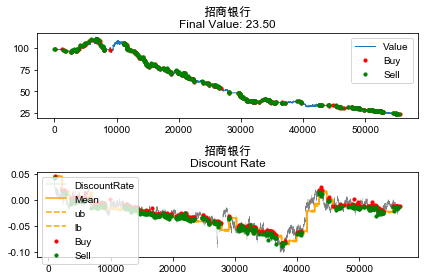

,0,1,2,3
0,100.000000,0.0,0.0,6.755803
1,99.581749,0.0,1.0,6.727547
2,99.223255,0.0,0.0,6.717272
3,99.223255,0.0,0.0,6.740390
4,99.223255,0.0,0.0,6.733968
...,...,...,...,...
55655,23.497534,0.0,0.0,7.793874
55656,23.497534,0.0,0.0,7.793874
55657,23.497534,0.0,0.0,7.793874
55658,23.497534,0.0,0.0,7.793874


In [70]:
from Stock import Stock
"""
Evaluate the result 
"""
stock1 = Stock('招商银行',df_AH=df_AH[['time','招商银行','招商银行.1','week_num']],week=True)
# stock2 = Stock('工商银行',df_AH=df_AH[['工商银行','工商银行.1']])
# stock3 = Stock('农业银行',df_AH=df_AH[['农业银行','农业银行.1']])

stock1.trading_rule(show_transaction=True,show_time=1)


In [14]:
import pandas as pd
v1 = np.array([1,2,3,4])
v2 = np.array([2,2,3,4])
t = pd.DataFrame([v1,v2]).T
print(t)

   0  1
0  1  2
1  2  2
2  3  3
3  4  4


In [9]:
import numpy as np
print(np.array([[1,2,3],[1,2,3]]))
print(np.array([[1,2,3],[1,2,3]]).T)

[[1 2 3]
 [1 2 3]]
[[1 1]
 [2 2]
 [3 3]]


In [15]:
import numpy as np
np.array([1,0,0]) + np.array([0,0,-1])

array([ 1,  0, -1])

In [18]:
import pandas as pd
df = pd.DataFrame([[1,2,3],[2,3,4]]).T

In [21]:
df[0].values.shape

(3,)

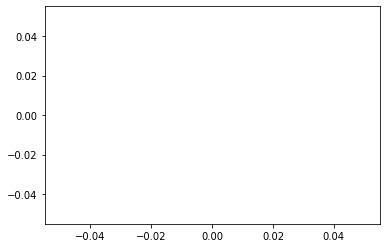

<function matplotlib.pyplot.close(fig=None)>

In [22]:
import matplotlib.pyplot as plt
plt.plot()
plt.pause(2)
plt.close